In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"]=(20,10)
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
df1=pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
grp=df1.groupby('area_type')
grp.first()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,Ready To Move,Uttarahalli,3 BHK,Kantsce,1440,2.0,3.0,62.00
Carpet Area,Ready To Move,Maruthi Sevanagar,2 BHK,SMikaay,950,2.0,2.0,47.00
Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


In [5]:
grp['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis=1)

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

/tmp/ipykernel_76/2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(20)  ######### ~ use as not operator

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def range_to_median(x):
    token = x.split('-')
    if len(token)==2:
        return float(token[0])/2+float(token[1])/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(range_to_median)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
range_to_median('34sq. ft') ### return none

In [19]:
df4.loc[30],df4.loc[410]

(location      Yelahanka
 size              4 BHK
 total_sqft       2475.0
 bath                4.0
 price             186.0
 bhk                   4
 Name: 30, dtype: object,
 location      Kengeri
 size            1 BHK
 total_sqft        NaN
 bath              1.0
 price            18.5
 bhk                 1
 Name: 410, dtype: object)

In [20]:
df4_p=df4.dropna()

In [21]:
df4_p.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [22]:
df4_p.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df5=df4_p.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df5['location'].unique().shape

(1298,)

In [25]:
df5.location=df5.location.apply(lambda x: x.strip())

In [26]:
location_stat=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [27]:
np.array(location_stat)  ## it is a number array actually but pandas.series.series in real form without conversion

array([533, 392, 304, ...,   1,   1,   1])

In [28]:
location_stat[location_stat<=10]

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [29]:
df5.location=df5.location.apply( lambda x: 'other' if x in location_stat[location_stat<=10] else x)

In [30]:
df5[df5.location=='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [31]:
df5.head()
df5.shape

(13200, 7)

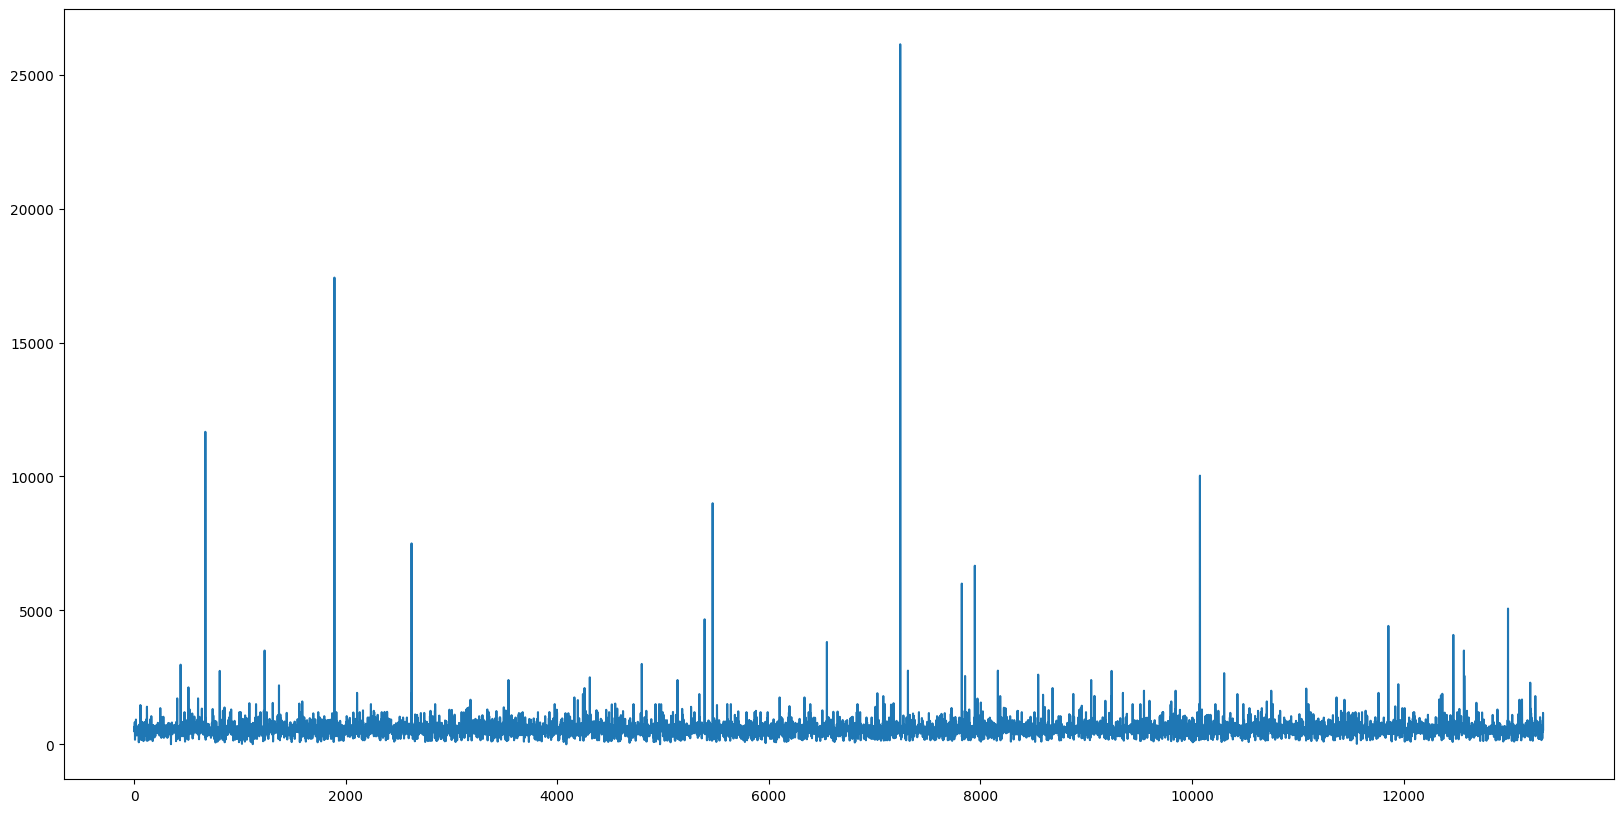

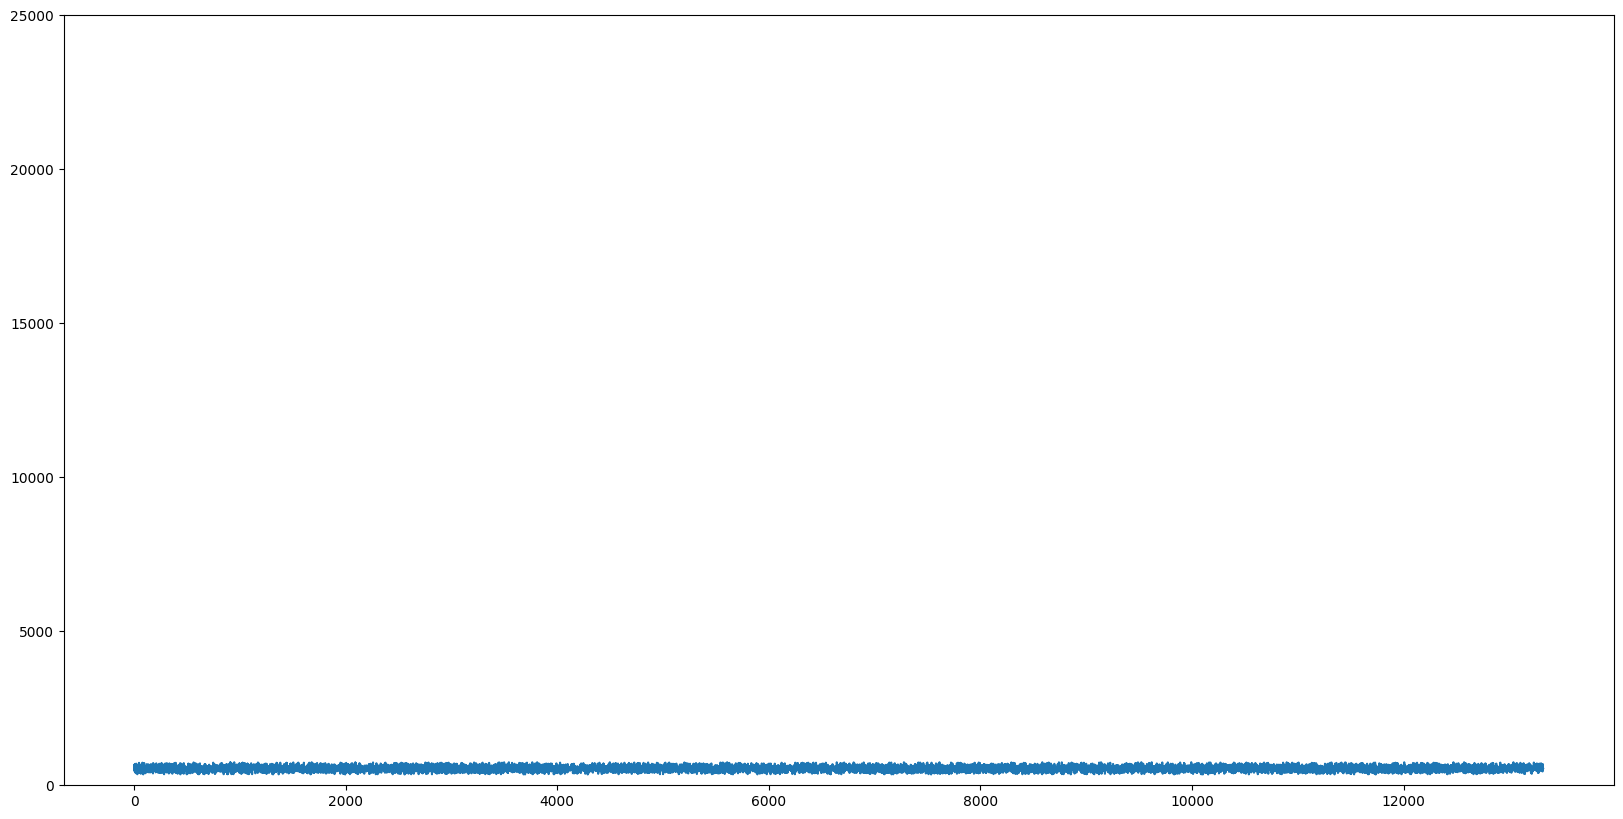

In [32]:
plt.plot(df5.total_sqft/df5.bhk)
temp=df5.total_sqft/df5.bhk
temp=temp[(temp>350) & (temp<750)]   ## IMP. TO USE () WHEN USING '&' BITWISE OPERATOR 
plt.show()
plt.plot(temp)
plt.ylim(0,25000)
plt.show()

In [33]:
### high lines are outlier

In [34]:
df6=df5[(df5.total_sqft/df5.bhk>300) & (df5.total_sqft/df5.bhk<750)]

In [35]:
df6.head()
print(df6.shape)
df6.describe()

(10932, 7)


,total_sqft,bath,price,bhk,price_per_sqft
count,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000
mean,1377.892523,2.428558,85.425544,2.562752,5860.778883
std,501.071601,0.944688,84.903402,0.914312,3728.027993
min,340.000000,1.000000,9.000000,1.000000,1250.000000
25%,1100.000000,2.000000,47.000000,2.000000,4128.440367
50%,1256.000000,2.000000,65.000000,2.000000,5102.460737
75%,1575.000000,3.000000,95.000000,3.000000,6482.230520
max,10000.000000,16.000000,3600.000000,16.000000,176470.588235


In [36]:
#### taking data withing [mean - s.d to mean + s.d] of price per sqft

In [37]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame() ### line a[]
    for key, subdf in df.groupby('location'):  ######## key imp to note good point###########
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]  ### use bitwise operator because [] contain 0 , 1 only so no 'and' should be used
        df_out=pd.concat([df_out,reduced_df],ignore_index=True) ### appending in a[]
    return df_out

In [38]:
df7=remove_pps_outliers(df6)
df7.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,8866.000000,8866.000000,8866.000000,8866.000000,8866.000000
mean,1351.511663,2.368148,75.030185,2.504399,5372.349325
std,460.560323,0.853536,45.171062,0.834556,1865.924147
min,350.000000,1.000000,10.000000,1.000000,1250.000000
25%,1100.000000,2.000000,47.590000,2.000000,4192.176352
50%,1250.000000,2.000000,64.080000,2.000000,5007.145888
75%,1540.000000,3.000000,89.040000,3.000000,6132.756133
max,10000.000000,16.000000,600.000000,16.000000,24509.803922


In [39]:
## remove data having more price for less sqft area for same location 

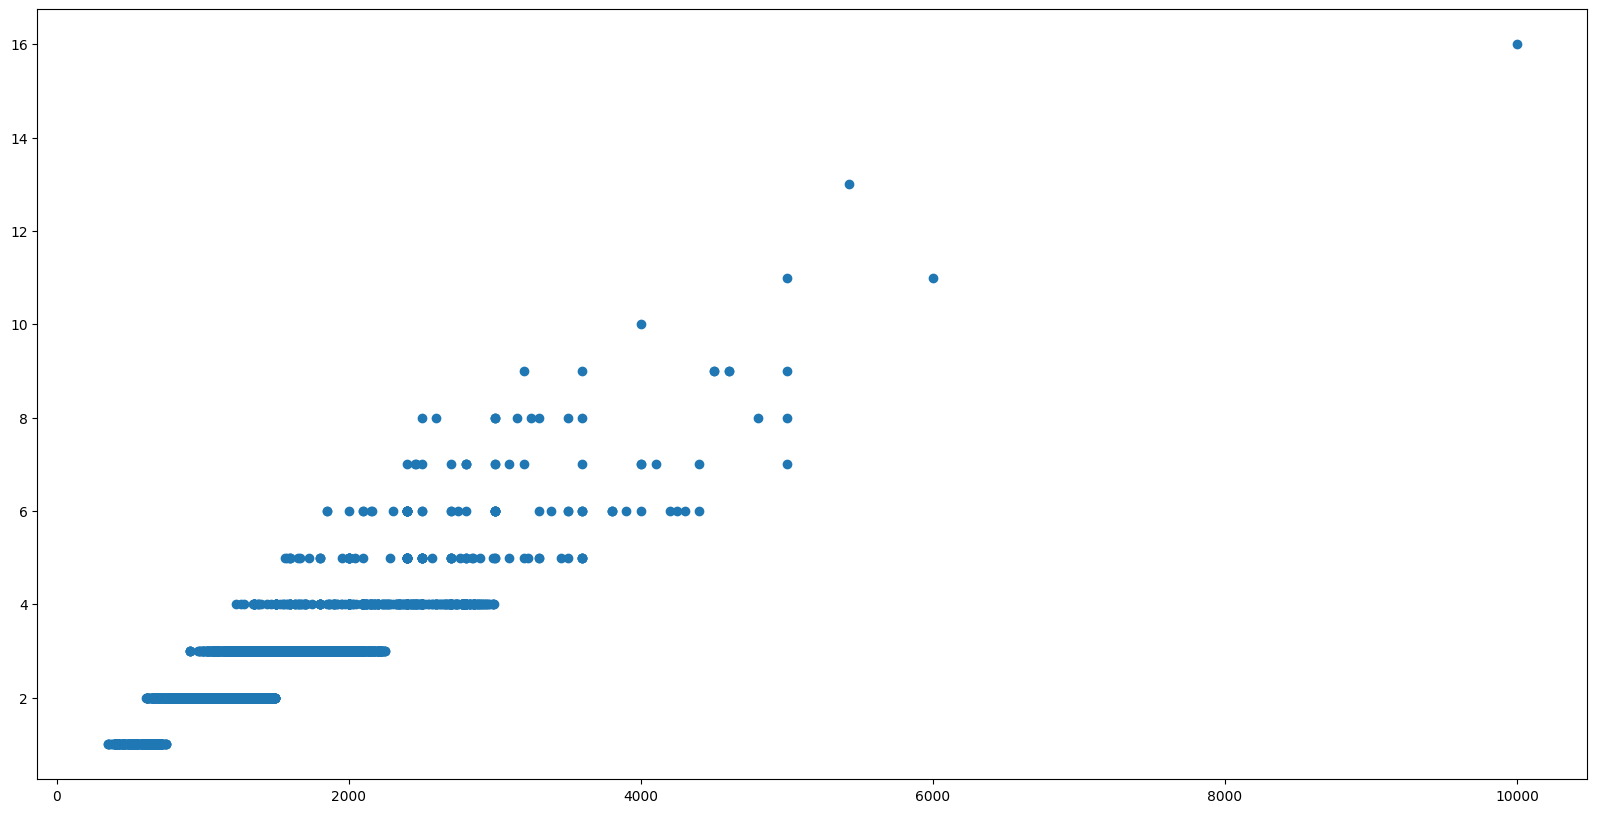

In [40]:
plt.scatter(df7.total_sqft,df7.bhk)
plt.show()

In [41]:
### lets focus on 2 and 3 bhk
def plot_scatter_chart(df, location):
    bhk2=df[(df.bhk==2) & (df.location==location)]
    bhk3=df[(df.bhk==3) & (df.location==location)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk' , s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 bhk' , s=50)
    plt.xlabel('Total sqft area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

In [42]:
############## reading row from csv data 
#### df.loc[[n],:]
df7.iloc[[1900],:]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1900,Electronic City,2 BHK,1200.0,2.0,34.65,2,2887.5


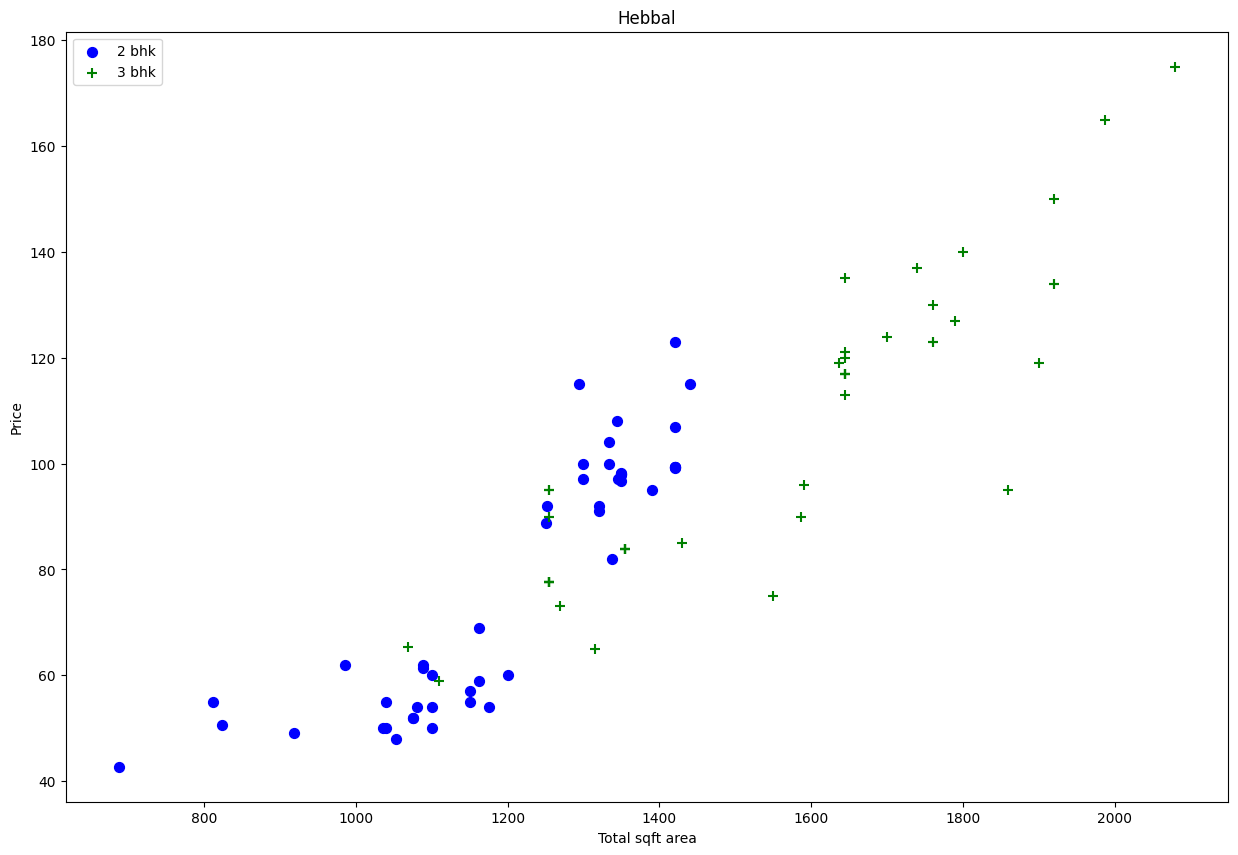

In [43]:
plot_scatter_chart(df7, 'Hebbal')

In [44]:
########## data in group by is like
### group 1, { group 1, size, price ,....}
### group 2, { group2, size, price, .....}
#
#
##     for location, location_df in df.groupby('location'): ==== ((location =group 2,)) and ((location_df = { group2, size, price, .....}))
# location_df has data of one location only

In [45]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'sd': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0],
                'ar_mean': np.mean(bhk_df.total_sqft)
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stat=bhk_stat.get(bhk-1)  ### bhk, bhk-1 comparison
            if stat and stat['count']>5:
                #exclude_indices=np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft<(stat['mean'])) & ((abs(bhk_df.total_sqft-(stat['ar_mean'])))<200)].index.values)
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stat['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [123]:
df8=remove_bhk_outliers(df7)
df7.shape[0],df8.shape[0]

(8866, 6285)

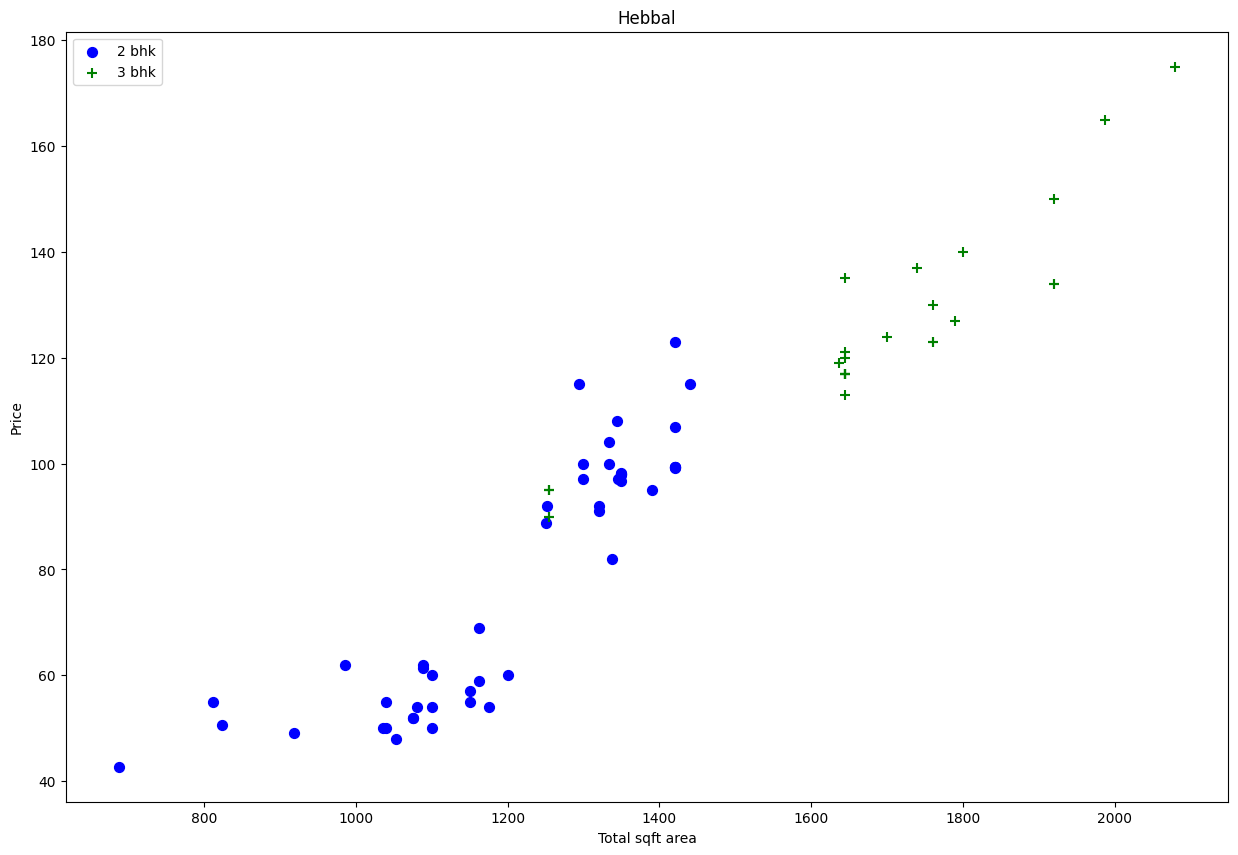

In [124]:
plot_scatter_chart(df8, 'Hebbal')

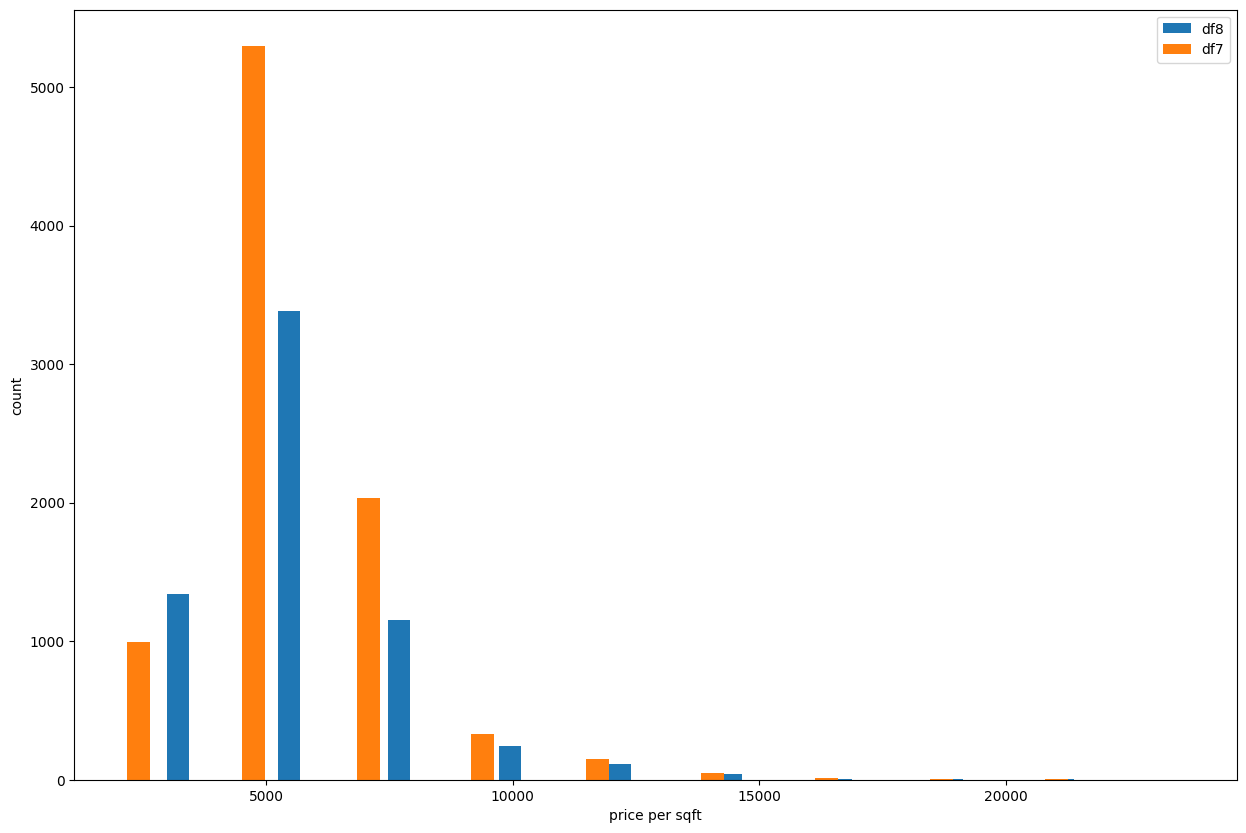

In [125]:
plt.hist(df8.price_per_sqft,rwidth=0.2,label='df8')
plt.hist(df7.price_per_sqft,rwidth=0.2,label='df7')
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.legend()

In [126]:
## df8 is apprx normal dist.
df9=df8
print(df9.shape[0])

###### drop values  


df9=df9.drop(df9[df9.bath>2+df9.bhk].index.values,axis=0)
print(df9.shape[0])

6285
6283


In [128]:
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
8853,other,3 BHK,1490.0,3.0,140.0,3,9395.973154
8856,other,3 BHK,1500.0,2.0,78.0,3,5200.000000
8858,other,2 BHK,1155.0,2.0,64.0,2,5541.125541
8860,other,2 BHK,1200.0,2.0,70.0,2,5833.333333


In [129]:
### size and price per sqft can be dropped they are not useful feature for training
## do not run twice once column removed wont removwd again
df9=df9.drop(['size','price_per_sqft'],axis=1)

In [130]:

df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [131]:
# AS ML CAN NOT INTERPRET TEXT DATA SO WE CREATE DUMMY OF LOCATION DATA WHERE A COLUMN WILL BE FORMED HAVE 1 AND ZEORS WILL REPRESENT PARTICULAR LOCATION
pd.get_dummies(df9.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
# 1st block jayanagar [1 0 0 0 0 0 0 0 0 0 0 0 0 0 ....] (( hot encoding method ))
# we can drop last colum bcz n-1 will do our work one with all zeros
dummies=pd.get_dummies(df9.location)
print(dummies.shape)
df10=pd.concat([df9,dummies.drop(['other'],axis=1)],axis=1)
print(df10.shape)
df10.head(3)

(6283, 240)
(6283, 244)


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df11=df10.drop(['location'],axis=1)
print(df11.shape)
df11.head(3)

(6283, 243)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
################################################## MACHINE TRAINING #########################################################

In [145]:
X=df11.drop(['price'],axis=1)
Y=df11.price
Y.shape, X.shape

((6283,), (6283, 242))

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [150]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)
print(model1.score(X_train,Y_train))
print(model1.score(X_test,Y_test))

0.8314545164230153
0.8012861420861868


In [151]:
from sklearn import ensemble
import seaborn as sns
import mpl_toolkits
model_2=ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.1,loss='squared_error')


In [152]:
model_2.fit(X_train,Y_train)
print(model_2.score(X_test,Y_test))
print(model_2.score(X_train,Y_train))

0.808045612767159
0.9115005129667928


In [154]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(model1, X, Y, cv=cv)

array([0.80438844, 0.78904678, 0.79297306, 0.80163006, 0.80648893])

In [157]:
### array([0.83537252, 0.78142101, 0.83467219, 0.80249678, 0.81997416]) for model 2

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [168]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=242)

In [177]:
np.where(X.columns=='Yelahanka')[0][0] ## position of location in columns

238

In [214]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return model_2.predict([x])[0]

In [215]:
predict_price('Rajaji Nagar',1700,3,3)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


213.70185799245235

In [216]:
########## exporting model contain cofficients and intercepts
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(model_2,f)

In [2]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))

NameError: name 'X' is not defined